In [4]:
#importing libraries
import os
import copy

import uproot
import awkward as ak
import vector
vector.register_awkward()
import matplotlib.pyplot as plt
import tqdm
import atlasopenmagic as atom
import XRootD
import requests

In [2]:
url = atom.get_urls(410470, protocol = 'https')
file = url[0]
file

Fetching and caching all metadata for release: 2024r-pp...
Successfully cached 374 datasets.


'https://opendata.cern.ch/eos/opendata/atlas/rucio/mc20_13TeV/DAOD_PHYSLITE.37620644._000012.pool.root.1'

In [8]:
# Download the file, use a local copy
local_filename = file.split("/")[-1]
print(f"Downloading {file} to {local_filename} ...")
with requests.get(file, stream=True) as r:
    r.raise_for_status()
    with open(local_filename, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)
print('download complete')

download complete


In [13]:
tree_int = uproot.open(local_filename)

In [14]:
for ii in tree_int.keys():
     print(ii)

##Params;3
##Params;2
##Shapes;3
##Shapes;2
##Links;3
##Links;2
MetaData;1
MetaDataHdr;1
MetaDataHdrForm;1
CollectionTree;1
POOLContainer;1
POOLContainerForm;1
POOLCollectionTree;1


In [15]:
tree = uproot.open(local_filename)['CollectionTree']

In [16]:
el_pt = tree['AnalysisElectronsAuxDyn.pt'].array()

In [19]:
el_pt

<Array [[], [], [], [], ..., [], [1.83e+04], []] type='160000 * var * float32'>

In [23]:
el_pt_np = ak.flatten(el_pt).to_numpy()
print('Number of electrons in', len(el_pt), 'events is', len(el_pt_np))
el_pt_np

Number of electrons in 160000 events is 103743


array([49111.31  ,  8444.114 , 66848.984 , ...,  8894.669 ,  6639.8667,
       18323.871 ], shape=(103743,), dtype=float32)

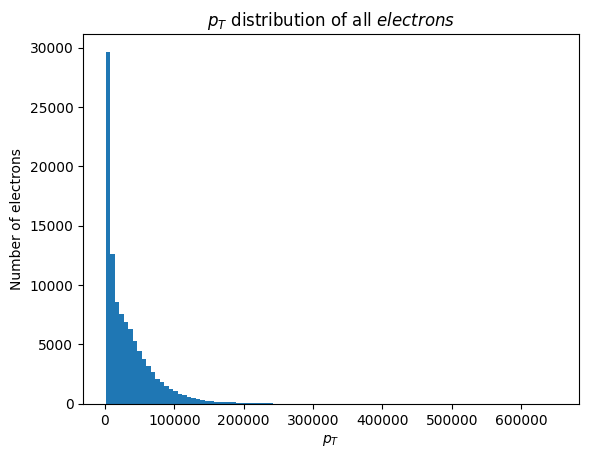

In [25]:
plt.hist(el_pt_np, bins=100)
plt.title('$p_T$ distribution of all $electrons$')
plt.xlabel('$p_T$')
plt.ylabel('Number of electrons')
plt.show()